## Natural Lenguage Processing (NLP) - Project RNEC  - Team 88


The process for answering any request in the “RNEC” depends on the correct analysis of the requests description. According to the standard procedure, the duty of classifying the type of request corresponds to public server and not to the citizen necessarily. Therefore, it results of a great value, the exploration and development of Natural Language Processing (NPL) `s techniques that can support the management of this process on the internal level.

We propose applying Natural Penguage processing techniques to identify main features related with the description of the requests written by citizens.

As a response to this need, we proposed the application of NLPS techniques in three levels: 

a) **Level 1:** Finding the mean words  

b) **Level 2:** Finding the principal topics

c) **Level 3:** A multi-class classification model

## Reading and cleaning data

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt

Creamos nuestra matriz tf-idf con el conjunto de solicitudes de enternamiento. Para esto, vamos a utilizar la librería de Python scikit-learn:

We read the fields of interest to this analysis:
* **id_tipo_solicitud**: Refers to the classification of the request: 0= Without classification, 1=Peticion; 2=Quejas; 3=Reclamos; 4=Sugerencias; 5=Felicitacion; 6=Denuncia; 7=Denuncia por Corrupcion; 8=Informacion Publica; 9=PQRSD Verbal

* **coment_solic**: Refers to the written description by the citizens

In [12]:
# Se leen los datos
data_df = pd.read_excel('RNEC_Descripcion_asunto_V2.xlsx', encoding= 'latin4') 
#data_df = pd.read_csv('Asunto_descripcion_RNEC_V2.csv', encoding= 'latin4') 
data_df.head()

,id_data,id_tipo_solicitud,coment_solic,id_asunto,id_solicitud_asunto
0,1,1,Buenas noches Mi nombre es Jesus Ariza escribo...,146,1_146
1,2,1,Buenas tardes solicito a ustedes el envio del ...,72,1_72
2,3,9,de manera respetuosa solicito copia de la reso...,126,9_126
3,4,6,Me he acercado en 2 oportunidades a la Registr...,165,6_165
4,5,6,No he podido inscribir mi cedula para votar en...,165,6_165


Removing rows where the **id_tipo_solicitud** is 0 since these does not have classification

In [13]:
#Eliminar los datos donde el tipo de solicitud es 0 ya que es un tipo de solicitud sin informacion
data_df['id_tipo_solicitud'].unique()
data_df2=data_df.copy()
data_df2=data_df2[data_df2['id_tipo_solicitud']!=0]
# El nuevo data frame solo contiene los tipos de solicitud clasificados asi:
# 1=Peticion; 2=Quejas; 3=Reclamos; 4=Sugerencias; 5=Felicitacion; 6=Denuncia; 7=Denuncia por Corrupcion; 8=Informacion Publica; 9=PQRSD Verbal
data_df2['id_tipo_solicitud'].unique()

array([1, 9, 6, 3, 5, 7, 8, 2], dtype=int64)

In [ ]:
data_df2.shape

Removing rows where the **id_tipo_solicitud** is "informacion no disponible en el Sistema de Informacion de la RNEC"

In [5]:
#El campo descripcion contiene registros vacios y con el valor "informacion no disponible en el Sistema de Informacion de la RNEC" que se debe eliminar
data_df3=data_df2.copy()
#Eliminar los NaN
data_df3=data_df3.dropna(subset=['coment_solic'])
# Eliminar campos con la info='Informacion no disponible en el Sistema de Informacion de la RNEC'
data_df3=data_df3[data_df3['coment_solic']!='Informacion no disponible en el Sistema de Informacion de la RNEC']
data_df3.shape

(114790, 5)

## Balance the data

We counts the total of rows (documents) that exists by each type of request and create a data frame with a equal numbers of documents by type of request choosen randomly

In [6]:
# Verificar cantidad de registros por tipo de solicitud
data_count_df=data_df3.groupby(['id_tipo_solicitud']).agg({'id_tipo_solicitud':'count'}).rename(columns={'id_tipo_solicitud':'Amount of requests'})
data_count_df

,Amount of requests
id_tipo_solicitud,
1,53400
2,12884
3,13573
5,234
6,3238
7,273
8,4417
9,26771


It can observe that the type of request Sugerencias (Id=4) dissappears after this cleaning of description field. Besides, the request  felicitaciones (Id=5) and  denuncias por corrupcion (Id=7) have less than 1000 rows. In order to mitigate problems of balance, we choose  3000 rows of each type of request, excluding type 5 and 7.

In [7]:
# Crear sub data frames por tipo de solicitud 
data_s1= data_df3[data_df3['id_tipo_solicitud']==1]
data_s2= data_df3[data_df3['id_tipo_solicitud']==2]
data_s3= data_df3[data_df3['id_tipo_solicitud']==3]
data_s6= data_df3[data_df3['id_tipo_solicitud']==6]
data_s8= data_df3[data_df3['id_tipo_solicitud']==8]
data_s9= data_df3[data_df3['id_tipo_solicitud']==9]

**SAMPLING**

In [8]:
#Para cada sub data frame elegir 3000 registros aleatoreamente
data_s1_sample= data_s1.sample(n=3000)
data_s2_sample= data_s2.sample(n=3000)
data_s3_sample= data_s3.sample(n=3000)
data_s6_sample= data_s6.sample(n=3000)
data_s8_sample= data_s8.sample(n=3000)
data_s9_sample= data_s9.sample(n=3000)

In [9]:
#Concatenate the 6 subsets
data_final=pd.concat([data_s1_sample,data_s2_sample,data_s3_sample,data_s6_sample,data_s8_sample,data_s9_sample], axis=0).reset_index()
data_final.head()

,index,id_data,id_tipo_solicitud,coment_solic,id_asunto,id_solicitud_asunto
0,100070,100071,1,Apreciados senores: Requiero el acta o registr...,142,1_142
1,106069,106070,1,Buenos dias. Por motivo de cierre de las ofici...,72,1_72
2,75587,75588,1,Buenas tardes solicito amablemente copia de mi...,95,1_95
3,68673,68674,1,Solicito con el mayor respeto se me envie todo...,13,1_13
4,200533,200534,1,Cordial saludo Soy paciente oncologico (tengo ...,97,1_97


In [10]:
data_final['coment_solic']=data_final['coment_solic'].astype(str)

## Cleaning data: Removing special characters, stopwords and more

In [11]:
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import string
import plotly
from nltk.stem import PorterStemmer 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jes_a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jes_a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Convert all text to lower**

In [12]:
data_final['coment_solic_new'] = data_final.coment_solic.apply(lambda x: x.lower())
data_final.head()

,index,id_data,id_tipo_solicitud,coment_solic,id_asunto,id_solicitud_asunto,coment_solic_new
0,100070,100071,1,Apreciados senores: Requiero el acta o registr...,142,1_142,apreciados senores: requiero el acta o registr...
1,106069,106070,1,Buenos dias. Por motivo de cierre de las ofici...,72,1_72,buenos dias. por motivo de cierre de las ofici...
2,75587,75588,1,Buenas tardes solicito amablemente copia de mi...,95,1_95,buenas tardes solicito amablemente copia de mi...
3,68673,68674,1,Solicito con el mayor respeto se me envie todo...,13,1_13,solicito con el mayor respeto se me envie todo...
4,200533,200534,1,Cordial saludo Soy paciente oncologico (tengo ...,97,1_97,cordial saludo soy paciente oncologico (tengo ...


**Removing special characteres**

In [13]:
import re
coment_backup = data_final.coment_solic_new.copy()
data_final.coment_solic_new = data_final.coment_solic_new.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))
data_final.coment_solic_new

0        apreciados senores  requiero el acta o registr...
1        buenos dias  por motivo de cierre de las ofici...
2        buenas tardes solicito amablemente copia de mi...
3        solicito con el mayor respeto se me envie todo...
4        cordial saludo soy paciente oncologico  tengo ...
                               ...                        
17995                                        estado cedula
17996                                    certticado cedula
17997                                            copia rcn
17998    para solicitar la tarjeta de identidad de prim...
17999                                        estado cedula
Name: coment_solic_new, Length: 18000, dtype: object

**Comparing the cleaning of special characters**

In [14]:
coment_backup.values[6]

'insc4ibi mi cedula de ciudadania para votar las proximas elecciones en mi lugar donde laboro y vivo ya hace mas de cuatro anos soy empleado de la multinacional drummond ltd y me ecuenrontadicado en curumani(cesar) lugar del cual me desplazo todos los dias a laborar y la cedula me fue anulada para votar en las proximas elecciones del 27 de octubre por trasumansiablo cual no es asi pues es el lugar donde vivir y laboro y no se me puede se negado el derecho a votar en este lugar pido sea atendida y resuelta mi petision hasta hace tres dias me entere de la anulacion de mi inscripcion lo cual me parese injusto como ciudadano del municipio de curumani.'

In [15]:
data_final.coment_solic_new[6]

'insc4ibi mi cedula de ciudadania para votar las proximas elecciones en mi lugar donde laboro y vivo ya hace mas de cuatro anos soy empleado de la multinacional drummond ltd y me ecuenrontadicado en curumani cesar  lugar del cual me desplazo todos los dias a laborar y la cedula me fue anulada para votar en las proximas elecciones del 27 de octubre por trasumansiablo cual no es asi pues es el lugar donde vivir y laboro y no se me puede se negado el derecho a votar en este lugar pido sea atendida y resuelta mi petision hasta hace tres dias me entere de la anulacion de mi inscripcion lo cual me parese injusto como ciudadano del municipio de curumani '

**Stop Words - Spanish**

In [16]:
import nltk
from pylab import rcParams
from wordcloud import WordCloud
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
token_lists = [word_tokenize(each) for each in data_final.coment_solic_new]
tokens = [item for sublist in token_lists for item in sublist]
tokens
print("Number of unique tokens then: ", len(set(tokens)))

Number of unique tokens then:  34138


In [18]:
#descripcion_solicitudes = data_final['coment_solic']
#descripcion_solicitudes
import nltk
nltk.download('stopwords')
noise_words = []
stopwords_corpus = nltk.corpus.stopwords
spanish_stop_words = stopwords_corpus.words('spanish')
noise_words.extend(spanish_stop_words)
print(len(noise_words))
#noise_words

313


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jes_a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## a) Level 1: Finding the **Key Words**

In [19]:
# Funcion que elimina stopwords y contabilizaz la cantidad de palabras clave
def get_top_n_words(corpus,n=1,k=1):
    vec = CountVectorizer(ngram_range=(k,k),stop_words = spanish_stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [20]:
descripciones_solicitudes = data_final['coment_solic_new']   
descripciones_solicitudes.head()

0    apreciados senores  requiero el acta o registr...
1    buenos dias  por motivo de cierre de las ofici...
2    buenas tardes solicito amablemente copia de mi...
3    solicito con el mayor respeto se me envie todo...
4    cordial saludo soy paciente oncologico  tengo ...
Name: coment_solic_new, dtype: object

In [22]:
common_words_solicitudes = get_top_n_words(descripciones_solicitudes, 25,1)

In [23]:
common_words_solicitudes

[('cedula', 11664),
 ('registraduria', 7963),
 ('gracias', 5896),
 ('documento', 5128),
 ('dia', 5100),
 ('si', 4868),
 ('tramite', 4366),
 ('dias', 4309),
 ('buenas', 4120),
 ('registro', 3982),
 ('cita', 3981),
 ('respuesta', 3838),
 ('saber', 3545),
 ('hacer', 3444),
 ('identidad', 3302),
 ('civil', 3271),
 ('duplicado', 3248),
 ('tardes', 3120),
 ('necesito', 3018),
 ('favor', 2874),
 ('buenos', 2744),
 ('mas', 2694),
 ('ciudadania', 2585),
 ('tarjeta', 2573),
 ('puedo', 2517)]

**Creating barplot of the top key words**

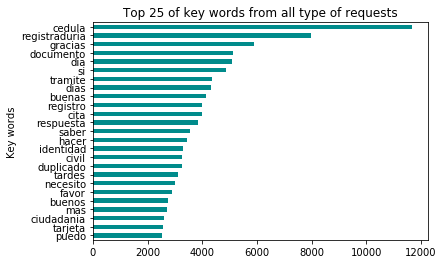

In [24]:
# Barplots que representa el top 20 de las palabras clave de todo el set de datos
df_top_words = pd.DataFrame(common_words_solicitudes, columns = ['Key words' , 'count'])
#df_top_words
#plt.figure(figsize=(5,5))
df_top_words.groupby('Key words').sum()['count'].sort_values(ascending=True).plot.barh(title='Top 25 of key words from all type of requests', color="darkcyan")

In [26]:
# Generarcion de las key words mas frecuentes del data set
common_words_solicitudes_FE = get_top_n_words(descripciones_solicitudes, 200,1)

In [27]:
# Generarcion de un data frame de las key words mas frecuentes del data set
df_key_words_FE = pd.DataFrame(common_words_solicitudes_FE, columns = ['Key words' , 'count'])
df_key_words_FE.shape

(200, 2)

**Generate the key Words csv file to the Front - End**

In [28]:
# Guardar key_words en un csv para el FE
df_key_words_FE.to_csv('key_words_RNEC.csv')

### Creating the word clouds

In [29]:
#review_words_lengths = descripcion_solicitudes.apply(lambda x: len(nltk.word_tokenize(x)))
import matplotlib.pyplot as plt
from wordcloud import WordCloud
## Setting the resolution for better clarity 
from pylab import rcParams
rcParams['figure.figsize'] = 16, 12

def word_cloud_request_type(data,tipo_solicitud):
    
    data_filtered = data[data.id_tipo_solicitud == tipo_solicitud] #filtering according to the type of request ID
    Reviews = data_filtered.coment_solic_new

    Reviews_text = ' '.join(Reviews.values) #joining all the words together

    # Creating a word cloud object
    wordcloud = WordCloud(stopwords = spanish_stop_words, max_font_size=100, max_words=100, background_color="white",\
                          scale = 10, width=800, height=400).generate(Reviews_text)


    # Plotting the generated word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

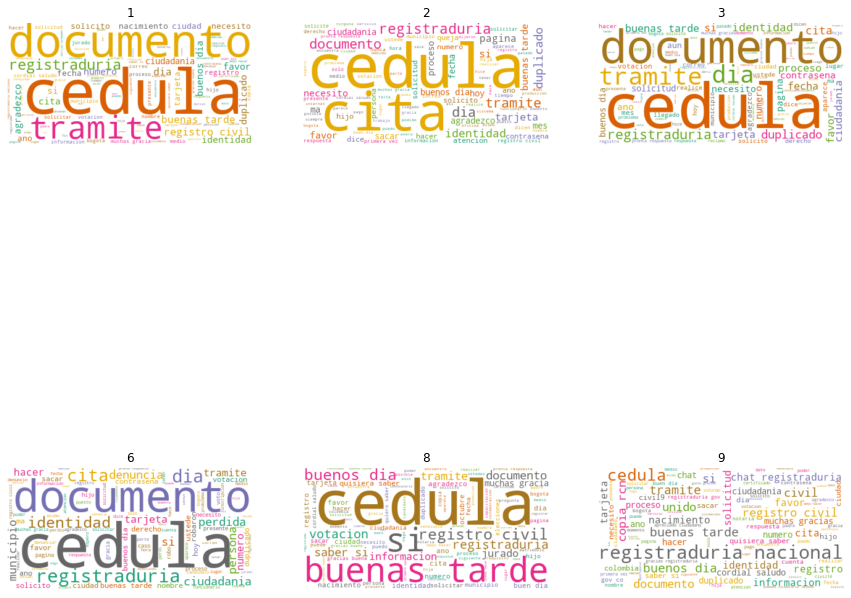

In [30]:
rcParams['figure.figsize'] = 15, 15
tipo_solicitudes=[1,2,3,6,8,9]
for count, i in enumerate(tipo_solicitudes):
    data_filtered = data_final[data_final.id_tipo_solicitud == i]
    descripciones = data_filtered.coment_solic_new
    descripciones_text = ' '.join(descripciones.values)
    wordcloud = WordCloud(stopwords = spanish_stop_words, max_font_size=100, max_words=100, background_color="white", colormap="Dark2",\
                          ).generate(descripciones_text)
    plt.subplot(2, 3, count+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(i)
plt.show

### Creating word clouds and csv files by type of request to the front-end APP

In [31]:
#Generar palabras clave por cada tipo de solicitud
# Crear sub data frames por tipo de solicitud 
data_final_peti= data_final[data_final['id_tipo_solicitud']==1] # Peticiones
data_final_quej= data_final[data_final['id_tipo_solicitud']==2] # Quejas
data_final_recl= data_final[data_final['id_tipo_solicitud']==3] # Reclamos
data_final_denu= data_final[data_final['id_tipo_solicitud']==6] # Denuncias
data_final_infop= data_final[data_final['id_tipo_solicitud']==8] # Informacion Publica
data_final_verbal= data_final[data_final['id_tipo_solicitud']==9] # Solicitud Verbal

In [32]:
descripciones_peticiones = data_final_peti['coment_solic_new']   
descripciones_quejas = data_final_quej['coment_solic_new'] 
descripciones_reclamos = data_final_recl['coment_solic_new'] 
descripciones_denuncias = data_final_denu['coment_solic_new'] 
descripciones_infpublica = data_final_infop['coment_solic_new'] 
descripciones_verbal = data_final_verbal['coment_solic_new'] 

In [33]:
common_words_peticiones = get_top_n_words(descripciones_peticiones, 25,1)
common_words_quejas = get_top_n_words(descripciones_quejas, 25,1)
common_words_reclamos = get_top_n_words(descripciones_reclamos, 25,1)
common_words_denuncias = get_top_n_words(descripciones_denuncias, 25,1)
common_words_infpublica = get_top_n_words(descripciones_infpublica, 25,1)
common_words_verbal = get_top_n_words(descripciones_verbal, 25,1)

In [34]:
df_key_words_peticiones = pd.DataFrame(common_words_peticiones, columns = ['Key words' , 'count'])
df_key_words_peticiones.to_csv('key_words_peticiones.csv')
#Quejas
df_key_words_quejas = pd.DataFrame(common_words_quejas, columns = ['Key words' , 'count'])
df_key_words_quejas.to_csv('key_words_quejas.csv')
#Reclamos
df_key_words_reclamos = pd.DataFrame(common_words_reclamos, columns = ['Key words' , 'count'])
df_key_words_reclamos.to_csv('key_words_reclamos.csv')
#Denuncias
df_key_words_denuncias = pd.DataFrame(common_words_denuncias, columns = ['Key words' , 'count'])
df_key_words_denuncias.to_csv('key_words_denuncias.csv')
#Info Publica
df_key_words_infpublica = pd.DataFrame(common_words_infpublica, columns = ['Key words' , 'count'])
df_key_words_infpublica.to_csv('key_words_infpublica.csv')
#PQRSD Verbal
df_key_words_verbal = pd.DataFrame(common_words_verbal, columns = ['Key words' , 'count'])
df_key_words_verbal.to_csv('key_words_PQRSD_Verbal.csv')

**Key words by Type of request**

Para Peticiones:

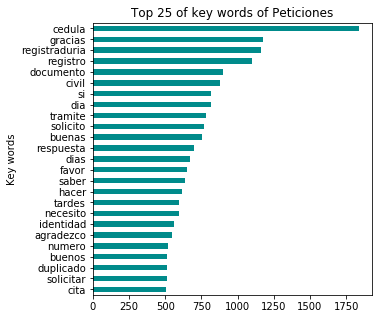

In [35]:
plt.figure(figsize=(5,5))
df_key_words_peticiones.groupby('Key words').sum()['count'].sort_values(ascending=True).plot.barh(title='Top 25 of key words of Peticiones', color="darkcyan")

Para Quejas:

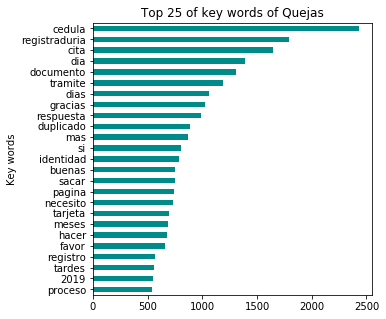

In [36]:
plt.figure(figsize=(5,5))
df_key_words_quejas.groupby('Key words').sum()['count'].sort_values(ascending=True).plot.barh(title='Top 25 of key words of Quejas', color="darkcyan")

Para reclamos:

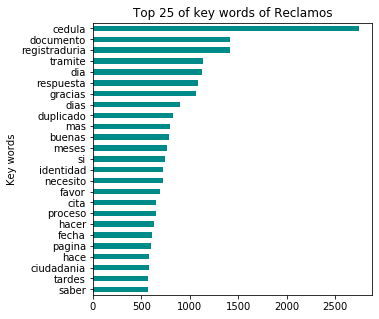

In [37]:
plt.figure(figsize=(5,5))
df_key_words_reclamos.groupby('Key words').sum()['count'].sort_values(ascending=True).plot.barh(title='Top 25 of key words of Reclamos', color="darkcyan")

Para denuncias:

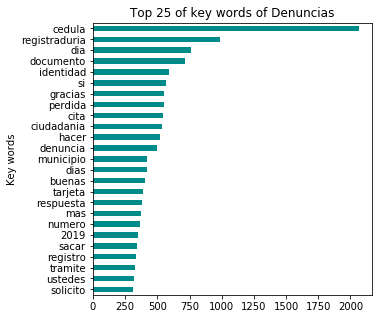

In [38]:
plt.figure(figsize=(5,5))
df_key_words_denuncias.groupby('Key words').sum()['count'].sort_values(ascending=True).plot.barh(title='Top 25 of key words of Denuncias', color="darkcyan")

Para Informacion Publica:

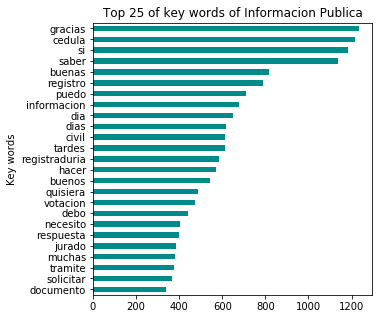

In [39]:
plt.figure(figsize=(5,5))
df_key_words_infpublica.groupby('Key words').sum()['count'].sort_values(ascending=True).plot.barh(title='Top 25 of key words of Informacion Publica', color="darkcyan")

PQRSD Verbal:

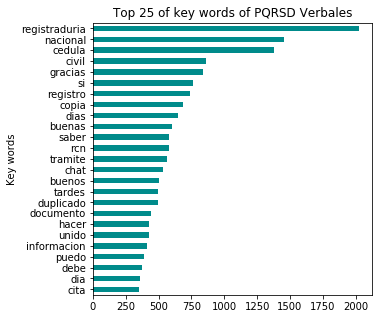

In [40]:
plt.figure(figsize=(5,5))
df_key_words_verbal.groupby('Key words').sum()['count'].sort_values(ascending=True).plot.barh(title='Top 25 of key words of PQRSD Verbales', color="darkcyan")

## a) Level 2: Finding the **key Topics** (3-grams)

In [41]:
common_topics = get_top_n_words(descripciones_solicitudes, 25,3)

In [42]:
common_topics

[('registraduria nacional civil', 601),
 ('registro civil nacimiento', 551),
 ('espero pronta respuesta', 446),
 ('cedula primera vez', 385),
 ('duplicado cedula ciudadania', 359),
 ('quisiera saber si', 345),
 ('nacional civil unido', 293),
 ('civil unido chat', 290),
 ('copia registro civil', 280),
 ('chat registraduria nacional', 270),
 ('registraduria gov co', 268),
 ('unido chat registraduria', 266),
 ('tarjeta identidad hijo', 262),
 ('registraduria nacional civil9', 246),
 ('mas pronto posible', 242),
 ('tarjeta identidad hija', 228),
 ('muchas gracias atencion', 224),
 ('buenas tardes quisiera', 212),
 ('sacar duplicado cedula', 211),
 ('tramite duplicado cedula', 203),
 ('gracias atencion prestada', 203),
 ('solicite duplicado cedula', 203),
 ('quiero saber si', 190),
 ('ejercer derecho voto', 183),
 ('registraduria nacional civil14', 175)]

## Creating barplots of top of key topics of all requests

In [ ]:
# Histograma que representa el top 20 de las palabras clave de todo el set de datos
df_top_topics = pd.DataFrame(common_topics, columns = ['Topics' , 'count'])
#df_top_words
plt.figure(figsize=(5,5))
df_top_topics.groupby('Topics').sum()['count'].sort_values(ascending=True).plot.barh(title='Top 25 of topics (3-grams) from all requests', color="darkcyan")

In [45]:
# Generacion 3- gramas CSV para el FE
common_topics_FE = get_top_n_words(descripciones_solicitudes, 50,3)
df_common_topics_FE = pd.DataFrame(common_topics_FE, columns = ['Topics' , 'count'])
df_common_topics_FE.to_csv('top50_topics_RNEC.csv')


In [46]:
data_final.head()

,index,id_data,id_tipo_solicitud,coment_solic,id_asunto,id_solicitud_asunto,coment_solic_new
0,100070,100071,1,Apreciados senores: Requiero el acta o registr...,142,1_142,apreciados senores requiero el acta o registr...
1,106069,106070,1,Buenos dias. Por motivo de cierre de las ofici...,72,1_72,buenos dias por motivo de cierre de las ofici...
2,75587,75588,1,Buenas tardes solicito amablemente copia de mi...,95,1_95,buenas tardes solicito amablemente copia de mi...
3,68673,68674,1,Solicito con el mayor respeto se me envie todo...,13,1_13,solicito con el mayor respeto se me envie todo...
4,200533,200534,1,Cordial saludo Soy paciente oncologico (tengo ...,97,1_97,cordial saludo soy paciente oncologico tengo ...


## Creating barplots of top of key topics of each type of request

In [49]:
common_topics_pet = get_top_n_words(descripciones_peticiones, 10,3)
common_topics_pet

[('registro civil nacimiento', 201),
 ('copia registro civil', 94),
 ('espero pronta respuesta', 76),
 ('duplicado cedula ciudadania', 72),
 ('registraduria nacional civil', 66),
 ('muchas gracias atencion', 63),
 ('mas pronto posible', 54),
 ('quisiera saber si', 53),
 ('cedula primera vez', 49),
 ('senores registraduria nacional', 48)]

In [50]:
common_topics_quej = get_top_n_words(descripciones_quejas, 10,3)
common_topics_quej

[('cedula primera vez', 144),
 ('tarjeta identidad hijo', 102),
 ('espero pronta respuesta', 102),
 ('duplicado cedula ciudadania', 100),
 ('tarjeta identidad hija', 82),
 ('sacar duplicado cedula', 71),
 ('cita duplicado cedula', 68),
 ('solicite duplicado cedula', 67),
 ('mas pronto posible', 62),
 ('cita sacar cedula', 56)]

In [51]:
common_topics_recl = get_top_n_words(descripciones_reclamos, 10,3)
common_topics_recl

[('espero pronta respuesta', 128),
 ('duplicado cedula ciudadania', 119),
 ('solicite duplicado cedula', 84),
 ('mas pronto posible', 81),
 ('cedula primera vez', 77),
 ('iniciar proceso produccion', 66),
 ('tarjeta identidad hija', 63),
 ('proximo iniciar proceso', 59),
 ('ejercer derecho voto', 58),
 ('tramite duplicado cedula', 56)]

In [52]:
common_topics_denu = get_top_n_words(descripciones_denuncias, 10,3)
common_topics_denu

[('perdida cedula ciudadania', 73),
 ('perdida documento identidad', 63),
 ('espero pronta respuesta', 57),
 ('perdida tarjeta identidad', 41),
 ('cedula primera vez', 41),
 ('denuncia perdida cedula', 33),
 ('registraduria nacional civil', 32),
 ('ejercer derecho voto', 31),
 ('gracias atencion prestada', 30),
 ('perdi cedula ciudadania', 28)]

In [53]:
common_topics_infop = get_top_n_words(descripciones_infpublica, 10,3)
common_topics_infop

[('quisiera saber si', 137),
 ('registro civil nacimiento', 116),
 ('quiero saber si', 89),
 ('copia registro civil', 66),
 ('buenas tardes quisiera', 62),
 ('buenos dias quisiera', 55),
 ('espero pronta respuesta', 53),
 ('27 octubre 2019', 50),
 ('saber si puedo', 49),
 ('tardes quisiera saber', 46)]

In [54]:
common_topics_verbal = get_top_n_words(descripciones_verbal, 10,3)
common_topics_verbal

[('registraduria nacional civil', 404),
 ('nacional civil unido', 293),
 ('civil unido chat', 290),
 ('chat registraduria nacional', 270),
 ('unido chat registraduria', 266),
 ('registraduria nacional civil9', 246),
 ('registraduria nacional civil14', 175),
 ('registraduria gov co', 174),
 ('registraduria nacional civil10', 138),
 ('registro civil nacimiento', 117)]

In [55]:
top_topics_peticiones = pd.DataFrame(common_topics_pet, columns = ['Topics' , 'count'])
top_topics_quejas = pd.DataFrame(common_topics_quej, columns = ['Topics' , 'count'])
top_topics_reclamos = pd.DataFrame(common_topics_recl, columns = ['Topics' , 'count'])
top_topics_denuncias = pd.DataFrame(common_topics_denu, columns = ['Topics' , 'count'])
top_topics_infpublica = pd.DataFrame(common_topics_infop, columns = ['Topics' , 'count'])
top_topics_verbal = pd.DataFrame(common_topics_verbal, columns = ['Topics' , 'count'])
#df_top_words
#df_top_topics.groupby('Topics').sum()['count'].sort_values(ascending=True).plot.barh(title='Top 20 of topics (3-grams) from all requests', color="darkcyan")

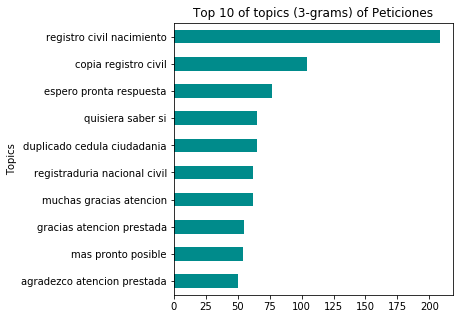

In [95]:
# Peticiones
plt.figure(figsize=(5,5))
top_topics_peticiones.groupby('Topics').sum()['count'].sort_values(ascending=True).plot.barh(title='Top 10 of topics (3-grams) of Peticiones', color="darkcyan")

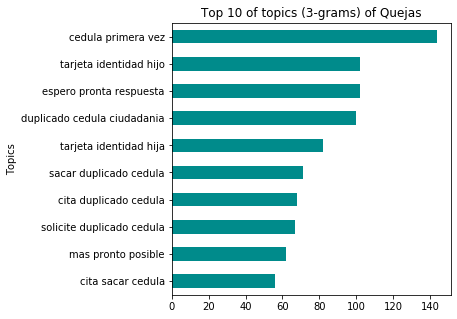

In [58]:
# Quejas
plt.figure(figsize=(5,5))
top_topics_quejas.groupby('Topics').sum()['count'].sort_values(ascending=True).plot.barh(title='Top 10 of topics (3-grams) of Quejas', color="darkcyan")

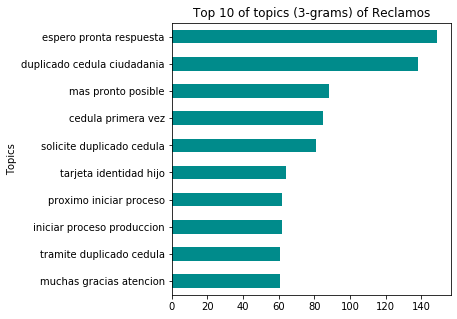

In [97]:
# Reclamos
plt.figure(figsize=(5,5))
top_topics_reclamos.groupby('Topics').sum()['count'].sort_values(ascending=True).plot.barh(title='Top 10 of topics (3-grams) of Reclamos', color="darkcyan")

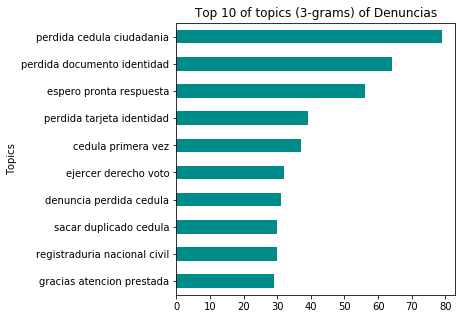

In [98]:
# Denuncias
plt.figure(figsize=(5,5))
top_topics_denuncias.groupby('Topics').sum()['count'].sort_values(ascending=True).plot.barh(title='Top 10 of topics (3-grams) of Denuncias', color="darkcyan")

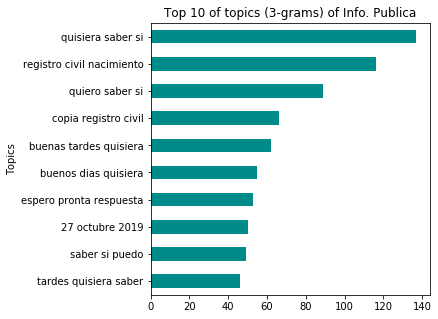

In [56]:
# Info Publica
plt.figure(figsize=(5,5))
top_topics_infpublica.groupby('Topics').sum()['count'].sort_values(ascending=True).plot.barh(title='Top 10 of topics (3-grams) of Info. Publica', color="darkcyan")

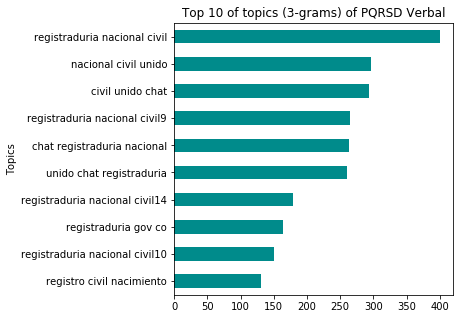

In [100]:
# PQRSD Verbal
plt.figure(figsize=(5,5))
top_topics_verbal.groupby('Topics').sum()['count'].sort_values(ascending=True).plot.barh(title='Top 10 of topics (3-grams) of PQRSD Verbal', color="darkcyan")

## b) Level 3: Multi -class texts classification model

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer 

## Create Bag of Words Matrix in csv file to the Front -End APP

In [32]:
#Para cada sub data frame elegir 3000 registros aleatoreamente
data_s1_sample_matrix= data_s1.sample(n=1000)
data_s2_sample_matrix= data_s2.sample(n=1000)
data_s3_sample_matrix= data_s3.sample(n=1000)
data_s6_sample_matrix= data_s6.sample(n=1000)
data_s8_sample_matrix= data_s8.sample(n=1000)
data_s9_sample_matrix= data_s9.sample(n=1000)

In [33]:
data_final_matrix=pd.concat([data_s1_sample_matrix,data_s2_sample_matrix,data_s3_sample_matrix,data_s6_sample_matrix,data_s8_sample_matrix,data_s9_sample_matrix], axis=0).reset_index()
data_final_matrix['coment_solic']=data_final_matrix['coment_solic'].astype(str)
data_final_matrix['coment_solic_new'] = data_final_matrix.coment_solic.apply(lambda x: x.lower())
data_final_matrix.coment_solic_new = data_final_matrix.coment_solic_new.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))
data_final_matrix.head()

,index,id_data,id_tipo_solicitud,coment_solic,id_asunto,id_solicitud_asunto,coment_solic_new
0,15155,15156,1,Buen dia Cordial Saludo A quien corresponda Co...,97,1_97,buen dia cordial saludo a quien corresponda co...
1,39039,39040,1,A continuacion doy a conocer la situacion que ...,71,1_71,a continuacion doy a conocer la situacion que ...
2,53833,53834,1,Buenas tardes: mi abuela nacio en cucuta colom...,144,1_144,buenas tardes mi abuela nacio en cucuta colom...
3,42073,42074,1,buen dia soy juan silva me gustaria que por fa...,137,1_137,buen dia soy juan silva me gustaria que por fa...
4,183135,183136,1,Hola quiero saber que requisitos nesecito para...,137,1_137,hola quiero saber que requisitos nesecito para...


In [34]:
descripciones_solicitudes_matrix=data_final_matrix['coment_solic_new']

In [35]:
vec = CountVectorizer(stop_words = spanish_stop_words)
X = vec.fit_transform(descripciones_solicitudes_matrix)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
#df.head()
#df.columns
#df.shape
#df.to_csv('matriz.csv')

In [36]:
df.head()

,00,000,0000,00000081,0000020460,0000035555,000032,0001en,0002,000455,...,zoom,zoraida,zoraids,zuleima,zulia,zully,zuluaga,zuniga,zunilda,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df.shape

(6000, 17603)

In [43]:
data_id_sol=data_final_matrix[['id_data','id_tipo_solicitud', 'coment_solic_new']]
#data_matriz.head()
#data_matriz.shape
data_id_sol.head()

,id_data,id_tipo_solicitud,coment_solic_new
0,15156,1,buen dia cordial saludo a quien corresponda co...
1,39040,1,a continuacion doy a conocer la situacion que ...
2,53834,1,buenas tardes mi abuela nacio en cucuta colom...
3,42074,1,buen dia soy juan silva me gustaria que por fa...
4,183136,1,hola quiero saber que requisitos nesecito para...


In [44]:
data_matrix=pd.concat([df, data_id_sol], axis=1).reset_index()

In [45]:
data_matrix.head()

,level_0,00,000,0000,00000081,0000020460,0000035555,000032,0001en,0002,...,zuleima,zulia,zully,zuluaga,zuniga,zunilda,zur,id_data,id_tipo_solicitud,coment_solic_new
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15156,1,buen dia cordial saludo a quien corresponda co...
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,39040,1,a continuacion doy a conocer la situacion que ...
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,53834,1,buenas tardes mi abuela nacio en cucuta colom...
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,42074,1,buen dia soy juan silva me gustaria que por fa...
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,183136,1,hola quiero saber que requisitos nesecito para...


In [46]:
data_matrix.to_csv('matriz_clasificador4.csv')

# Appliying classification algorihtms 

In [59]:
# Variables
solicitudes = data_final['coment_solic_new']
tipos = data_final['id_tipo_solicitud']

In [ ]:
#Creando el conjunto de entrenamiento y test

In [61]:
p_train = 0.85 # Porcentaje de train.

solic_train = solicitudes[:int((len(solicitudes))*p_train)] 
solic_test = solicitudes[int((len(solicitudes))*p_train):]
tipos_train = tipos[:int((len(solicitudes))*p_train)] 
tipos_test = tipos[int((len(solicitudes))*p_train):]

In [63]:
stopwords_corpus = nltk.corpus.stopwords
spanish_stop_words = stopwords_corpus.words('spanish')
noise_words.extend(spanish_stop_words)

In [64]:
#Creamos nuestra matriz tf-idf con el conjunto de solicitudes de enternamiento. Para esto, vamos a utilizar la librería de Python scikit-learn:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = TfidfVectorizer(noise_words)
vectorizer
X_train = vectorizer.fit_transform(solic_train)
y_train = tipos_train

In [65]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [70]:
medidor = 0

solic_test_reset = solic_test.reset_index()
tipos_test_reset = tipos_test.reset_index()
n = len(solic_test_reset['coment_solic_new'])

for counter in range(0, n):
    text = solic_test_reset['coment_solic_new'][counter]
    x = KNN.predict(vectorizer.transform([text]))[0]
    if x == tipos_test_reset['id_tipo_solicitud'][counter]:
        medidor = medidor + 1
    


'El ajuste KNN fue de {:04.2f}%'.format(100*medidor/n)

'El ajuste KNN fue de 25.56%'

In [68]:
from sklearn.naive_bayes import MultinomialNB
BAY = MultinomialNB().fit(X_train, y_train)

In [75]:
medidor = 0

solic_test_reset = solic_test.reset_index()
tipos_test_reset = tipos_test.reset_index()
n = len(solic_test_reset['coment_solic_new'])

for counter in range(0, n):
    text = solic_test_reset['coment_solic_new'][counter]
    x = BAY.predict(vectorizer.transform([text]))[0]
    #print(x)
    if x == tipos_test_reset['id_tipo_solicitud'][counter]:
        medidor = medidor + 1
    
'El ajuste BAYES fue de {:04.2f}%'.format(100*medidor/n)

'El ajuste BAYES fue de 15.85%'